In [1]:
# Алексеев Д.П. (DSU-4,FEML-8)
# Домашнее задание к лекции «Поиск выбросов и генерация новых признаков" обновленное» (#8).

# Задание:
# Взять датасет https://www.kaggle.com/c/sberbank-russian-housing-market/overview

# 1) Провести EDA с упором на пропущенные значения и выбросы
# 2) Обучить простую модель несколько раз (см. ниже) и сравнить качество.
# 3) При обучении модели постепенно фильтровать выбросы и заполнять пропуски. 
#    При фильтрации выбросов и заполнении пропусков при необходимости обосновывать выбранные методы.
# 4) Сгенерировать не менее новых 5 признаков (генерация с помощью PolynomialFeatures считать как один признак) 
#    и обучить модель после каждого добавления нового признака для контроля качества.
# 5) Построить изменения качества график качества модели на каждом шаге 
#    (после обработки каждого признака и после каждого добавления нового признака).

# Используйте столбцы
# [‘full_sq’, ‘life_sq’, ‘floor’, ‘max_floor’, ‘material’, ‘build_year’, ‘num_room’, ‘kitch_sq’,
# ‘state’, ‘area_m’, ‘raion_popul’, ‘green_zone_part’, ‘indust_part’, ‘preschool_education_centers_raion’,
# ‘school_education_centers_raion’, ‘hospital_beds_raion’, ‘healthcare_centers_raion’, ‘sport_objects_raion’,
# ‘additional_education_raion’, ‘shopping_centers_raion’, ‘office_raion’, ‘ID_metro’, ‘metro_min_walk’, ‘kindergarten_km’,
# ‘school_km’, ‘park_km’, ‘green_zone_km’, ‘industrial_km’, ‘water_km’, ‘mkad_km’, ‘ttk_km’, ‘sadovoe_km’, ‘bulvar_ring_km’,
# ‘kremlin_km’, ‘ts_km’, ‘big_market_km’,‘market_shop_km’, ‘fitness_km’, ‘university_km’, ‘workplaces_km’, ‘shopping_centers_km’,
# ‘office_km’, ‘additional_education_raion’, ‘preschool_km’, ‘price_doc’]

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt

In [3]:
# загрузим полный датасет
data_all = pd.read_csv('E:\\Netology\\Machine Learning\\Practice\\sberbank-russian-housing-market\\train.csv')
print(data_all.shape)
data_all.head()

(30471, 292)


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [4]:
# оставим только нужные колонки в соответствии с заданием
data_selected = data_all[['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km', 'market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'additional_education_raion', 'preschool_km', 'price_doc']]
data_selected.describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_raion,preschool_km,price_doc
count,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,3.047100e+04,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,1.765705e+07,...,13.283916,3.958882,1.154586,6.855891,3.926702,1.505808,2.010973,2.896393,1.345235,7.123035e+06
std,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,2.064961e+07,...,8.497170,3.447536,1.541425,6.731484,4.907562,2.253759,2.306446,3.290058,3.053600,4.780111e+06
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,2.081628e+06,...,0.661366,0.003847,0.000000,0.000313,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,7.307411e+06,...,7.529625,1.543631,0.361170,2.201193,1.016728,0.483758,0.555231,1.000000,0.285124,4.740002e+06
50%,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,1.050803e+07,...,11.910442,2.927417,0.656267,4.337579,2.031685,0.839647,1.052999,2.000000,0.493048,6.274411e+06
75%,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,1.803644e+07,...,16.560167,5.485423,1.333994,9.380269,5.415663,1.549517,3.046687,4.000000,0.936324,8.300000e+06
max,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,2.060718e+08,...,59.501648,41.103651,26.652505,84.862148,55.278225,26.259543,18.958933,16.000000,47.394706,1.111111e+08


In [5]:
# оценим общее качество данных
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   full_sq                            30471 non-null  int64  
 1   life_sq                            24088 non-null  float64
 2   floor                              30304 non-null  float64
 3   max_floor                          20899 non-null  float64
 4   material                           20899 non-null  float64
 5   build_year                         16866 non-null  float64
 6   num_room                           20899 non-null  float64
 7   kitch_sq                           20899 non-null  float64
 8   state                              16912 non-null  float64
 9   area_m                             30471 non-null  float64
 10  raion_popul                        30471 non-null  int64  
 11  green_zone_part                    30471 non-null  flo

In [6]:
# из data_selected.info() мы видим, что в датасете все переменные числовые (типа 'int64' или 'float64'), 
# и нет категориальных переменных (типа 'object' или 'string'), 
# т.е. энкодеры для обработки категориальных переменных применять не нужно.  
# Но есть много пропусков в некоторых признаках, выведем их список:
columns_with_NA = data_selected.columns[data_selected.isnull().any()].tolist()
pd.isnull(data_selected[columns_with_NA]).sum().sort_values(ascending=False)

hospital_beds_raion    14441
build_year             13605
state                  13559
max_floor               9572
material                9572
num_room                9572
kitch_sq                9572
life_sq                 6383
floor                    167
metro_min_walk            25
dtype: int64

<AxesSubplot:>

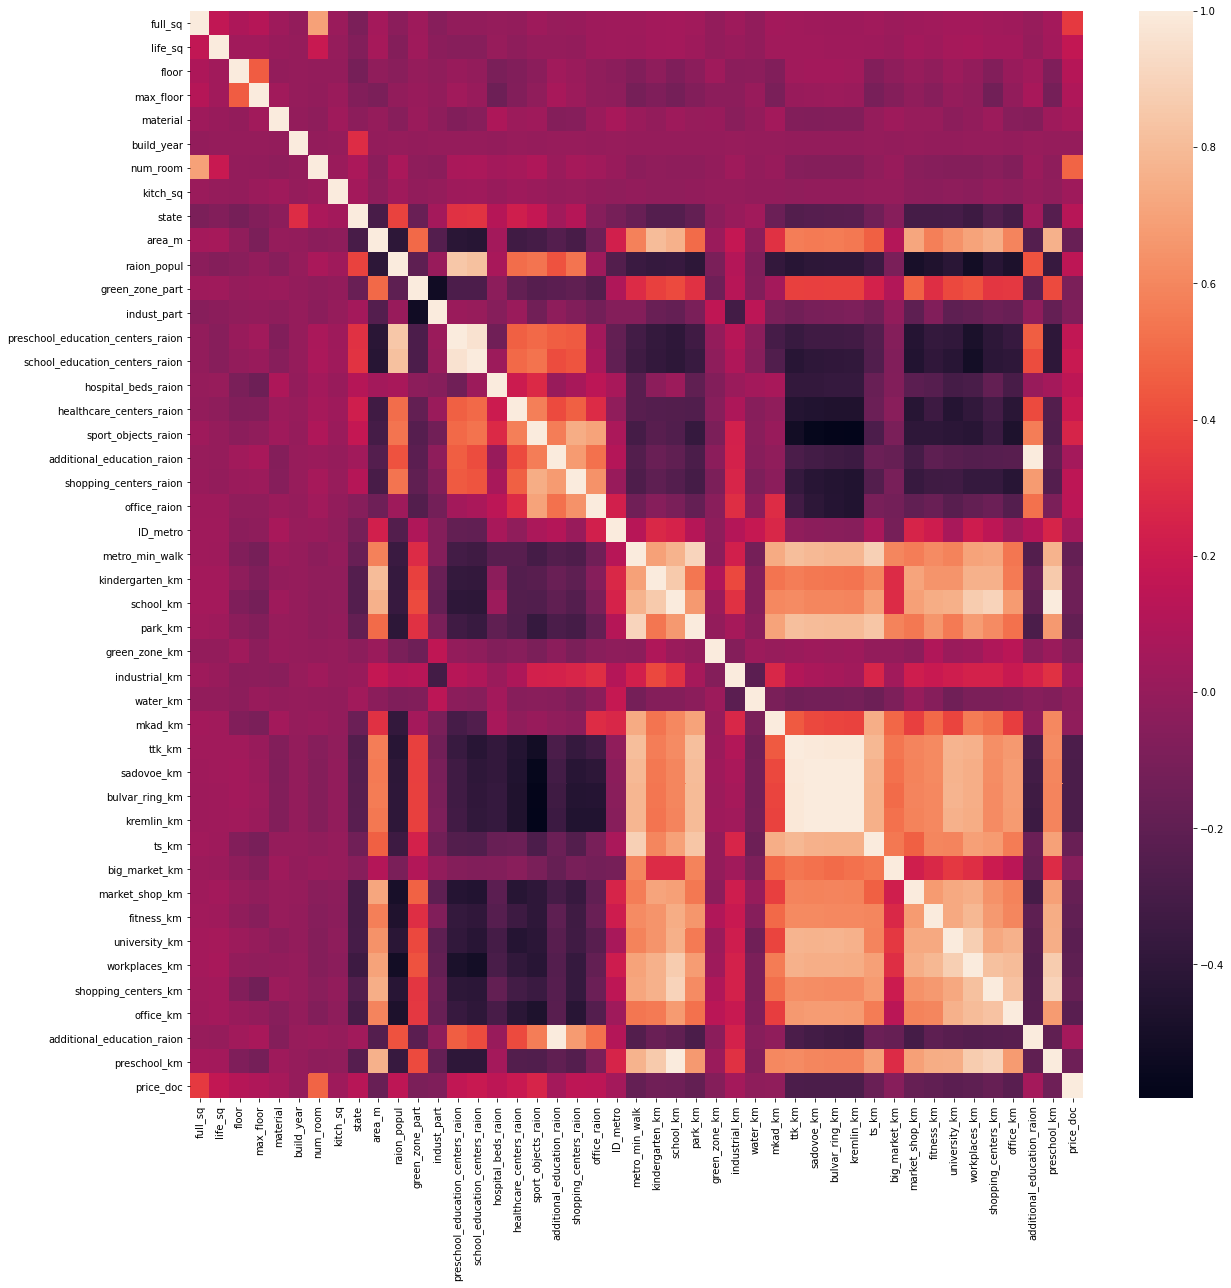

In [7]:
# построим тепловую карту взаимной корреляции всех признаков (включая целевую переменную price_doc)
plt.figure(figsize = (20, 20))
sns.heatmap(data_selected.corr())

Из тепловой карты можно сделать следующие выводы:
    
    а) в датасете задублирован признак 'additional_education_raion' (кандидат на удаление)
    
    б) признаки с высокой взаимной корреляцией - 'ttk_km', 'sadovoe_km', 'bulvar_ring_km', 'kremlin_km' 
       (попробуем потом оставить какой-нибудь один из них и посмотреть на изменение качества предсказаний).
       
    в) признаки с высокой взаимной корреляцией - 'preschool_education_centers_raion', 'school_education_centers_raion'
       (попробуем потом оставить какой-нибудь один из них и посмотреть на изменение качества предсказаний).
       
    г) на целевую переменную 'price_doc' более всего влияют кол-во комнат ('num_room') и общая площадь ('full_sq'), 
    что логично.

In [8]:
# Для начала попробуем просто выкинуть все пропуски из датасета (без заполнения пропусков), 
# обучить модель на этих данных и зафиксировать базовый коэфф-т детерминации.
base_set = data_selected.dropna()
base_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8618 entries, 8056 to 30470
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   full_sq                            8618 non-null   int64  
 1   life_sq                            8618 non-null   float64
 2   floor                              8618 non-null   float64
 3   max_floor                          8618 non-null   float64
 4   material                           8618 non-null   float64
 5   build_year                         8618 non-null   float64
 6   num_room                           8618 non-null   float64
 7   kitch_sq                           8618 non-null   float64
 8   state                              8618 non-null   float64
 9   area_m                             8618 non-null   float64
 10  raion_popul                        8618 non-null   int64  
 11  green_zone_part                    8618 non-null   f

In [9]:
# создадим список результатов для накопления оценок по разным вариантам обучения
score_results = []

In [10]:
# создадим и обучим модель линейной регрессии на базовом датасете base_set:
model = LinearRegression()

X = base_set[['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km', 'market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'additional_education_raion', 'preschool_km']]

y = base_set['price_doc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)

# коэфф-т детерминации на тестовой выборке
score = model.score(X_test, y_test)
score_results.append(score)
print("Коэффициент детерминации на датасете base_set:", score)

Коэффициент детерминации на датасете base_set: -57.279529781339185


Мы видим, что коэфф-т детерминации получился отрицательным (-57.279529781339185), чего в принципе быть не должно.
Это может означать, что модель в данном варианте предсказывает очень плохо 
(например, вывод обычного среднего значения целевой переменной дал бы лучшие результаты, чем предсказания модели).

Предположу, что такая ситуация возникла из-за наличия выбросов, а также удаления "в лоб" всех пустых значений, 
что сократило объем полезных данных для обучения.

In [11]:
# Попробуем не удалять, а заполнить пустые значения признаков средними по колонке и посмотреть, что получится.

# сперва сделаем копию датасета
set_2 = data_selected.copy() 

# Воспользуемся классом SimpleImputer библиотеки scikit-learn
from sklearn.impute import SimpleImputer

simp = SimpleImputer(missing_values = np.nan, strategy='mean') # будем заполнять пропуски средним значением по колонке
simp = SimpleImputer().fit_transform(set_2) # тренируем и заполняем

# преобразуем результат обратно в датафрейм
transformed = pd.DataFrame(simp, columns=data_selected.columns)
transformed

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_raion,preschool_km,price_doc
0,43.0,27.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,6.407578e+06,...,10.814172,1.676258,0.485841,6.715026,0.884350,0.648488,0.637189,3.0,0.177975,5850000.0
1,34.0,19.000000,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,9.589337e+06,...,6.910568,3.424716,0.668364,1.852560,0.686252,0.519311,0.688796,1.0,0.273345,6000000.0
2,43.0,29.000000,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,4.808270e+06,...,5.752368,1.375443,0.733101,0.841254,1.510089,1.486533,1.543049,1.0,0.158072,5700000.0
3,89.0,50.000000,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,1.258354e+07,...,27.892717,0.811275,0.623484,10.903161,0.622272,0.599914,0.934273,6.0,0.236455,13100000.0
4,77.0,77.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,8.398461e+06,...,9.155057,1.969738,0.220288,0.991683,0.892668,0.429052,0.077901,2.0,0.376838,16331452.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44.0,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,8.820934,0.812253,0.063432,2.236806,1.442576,0.325885,1.103579,3.0,0.349899,7400000.0
30467,86.0,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,12.102735,1.825643,0.398831,0.672662,0.796851,0.540003,0.069986,16.0,0.362681,25000000.0
30468,45.0,34.403271,10.0,20.000000,1.000000,3068.057097,1.000000,1.000000,1.000000,2.553630e+07,...,15.546028,6.433794,1.519553,12.893684,9.479093,1.806570,4.338453,0.0,1.234235,6970959.0
30469,64.0,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,2.515959,2.711199,0.412813,1.982450,2.340429,1.108672,1.204798,1.0,0.130667,13500000.0


Из результатов заполнения пропусков средними значениями можно предположить, что из-за наличия выбросов результаты будут не очень хорошими, т.к. например, в датасете оказались дома со средним годом постройки, равным 3068. А также мы "в лоб" заполнили средним значением дискретные признаки (например, max_floor, material, build_year, num_room, state не могут быть дробными величинами).  Всё же попробуем оценить качество модели при заполнении пропусков "в лоб" средними значениями.

In [12]:
# создадим и обучим модель линейной регрессии на датасете transformed:
model = LinearRegression()

X = transformed[['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km', 'market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'additional_education_raion', 'preschool_km']]

y = transformed['price_doc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)

# коэфф-т детерминации на тестовой выборке
score = model.score(X_test, y_test)
score_results.append(score)
print("Коэффициент детерминации на датасете transformed:", score)

Коэффициент детерминации на датасете transformed: 0.38332440690058


Коэфф-т детерминации действительно невысок (0.38332440690058), но мы по крайней мере вышли в плюс))
Попробуем оценить наличие выбросов (на первоначальном датасете data_selected) и понять, что с ними можно сделать.

C:\Python\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 1440x360 with 0 Axes>

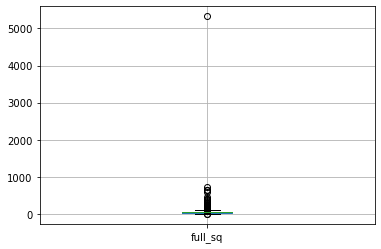

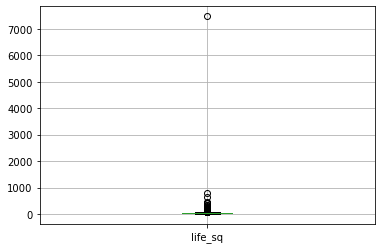

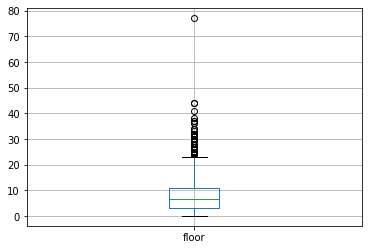

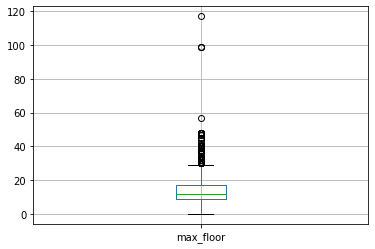

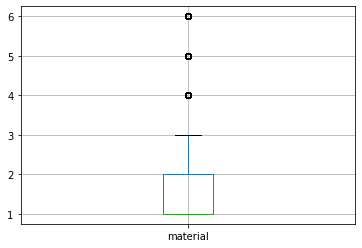

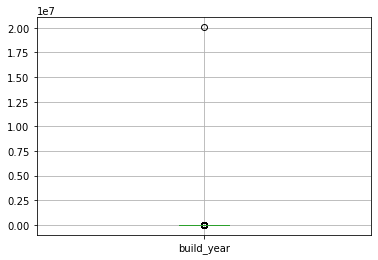

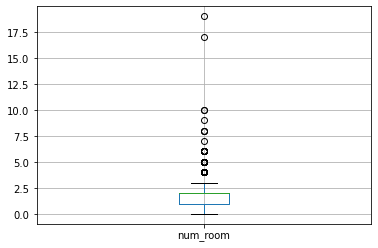

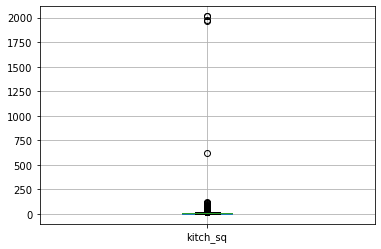

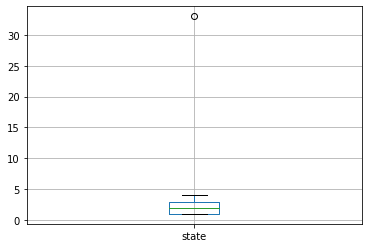

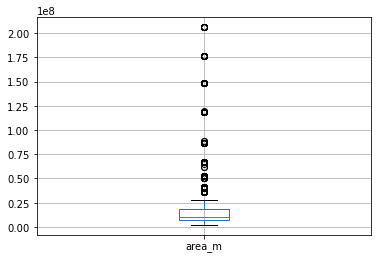

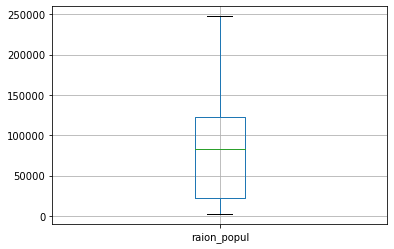

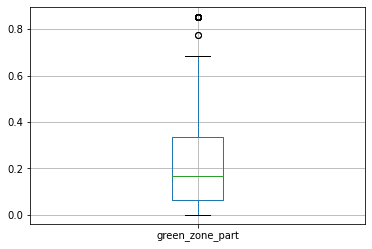

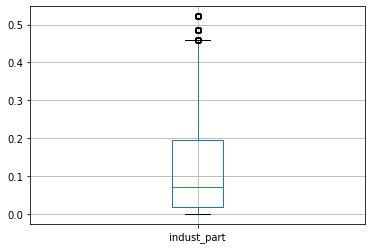

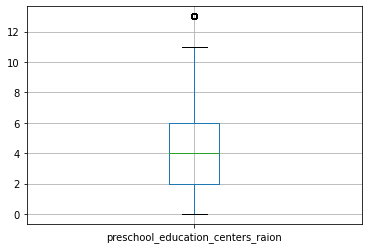

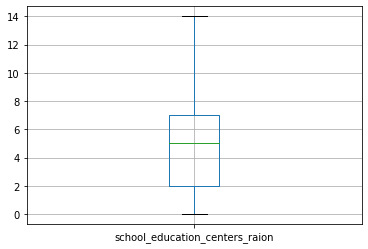

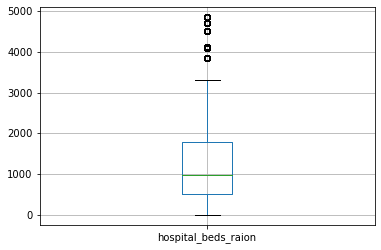

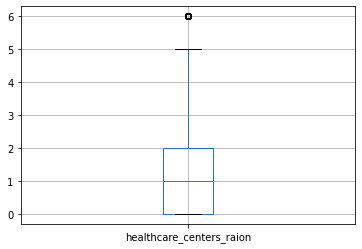

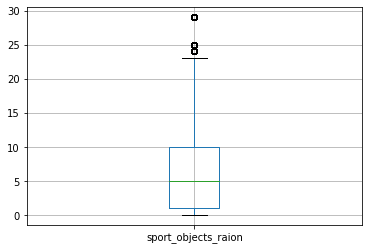

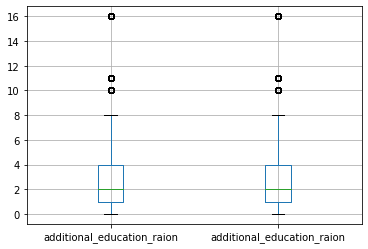

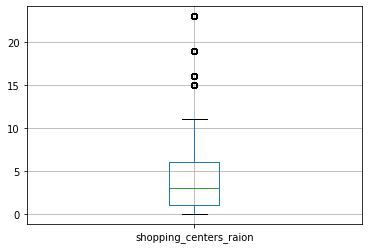

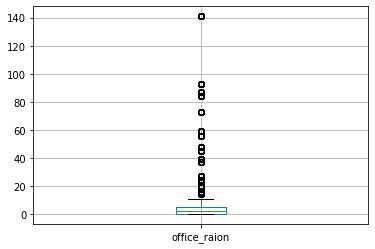

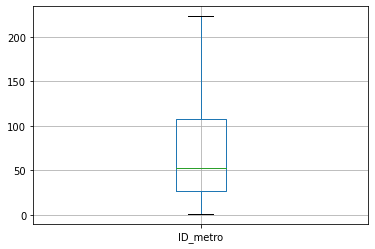

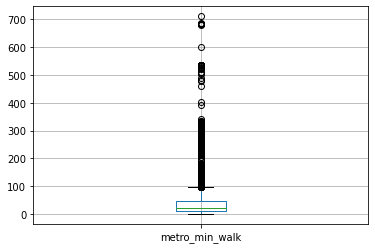

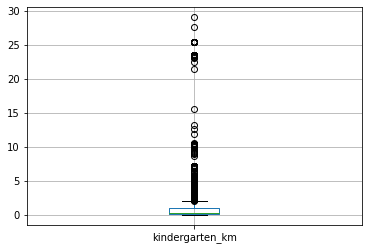

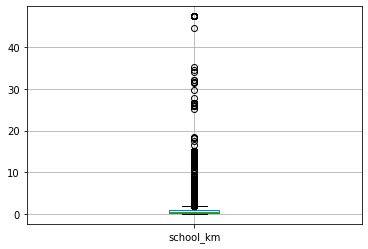

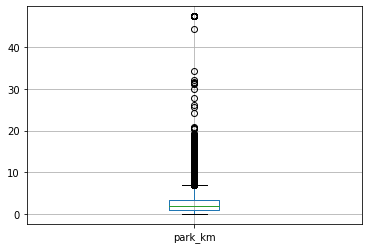

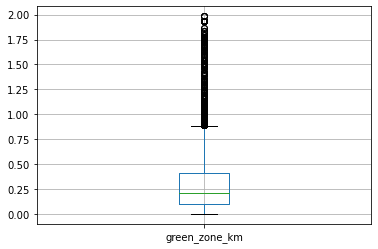

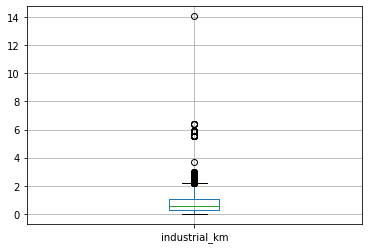

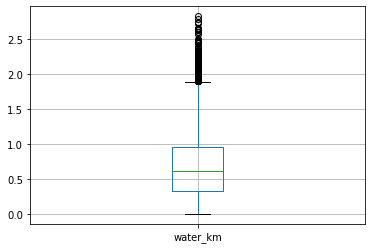

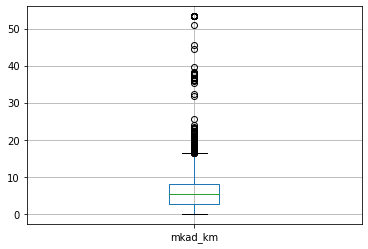

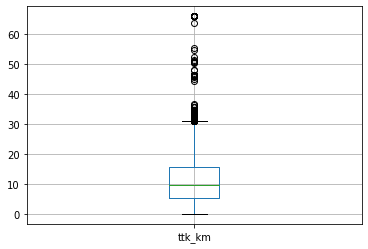

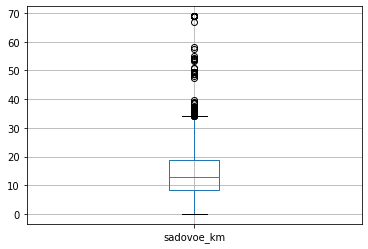

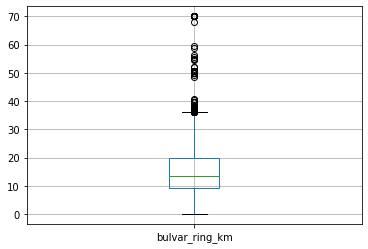

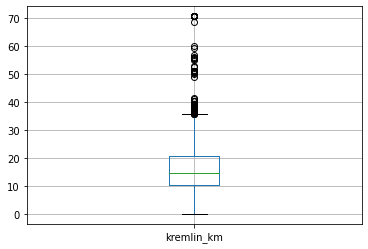

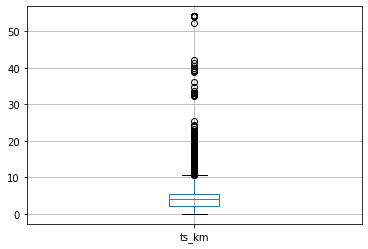

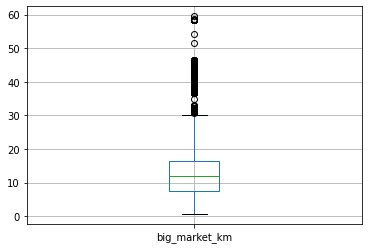

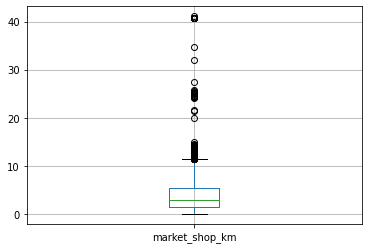

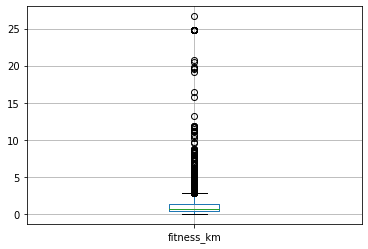

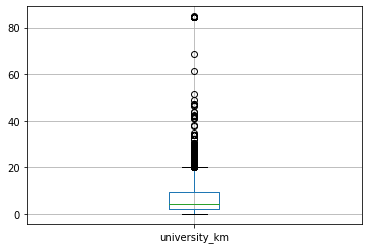

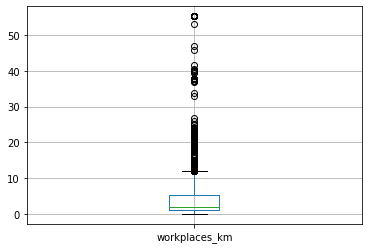

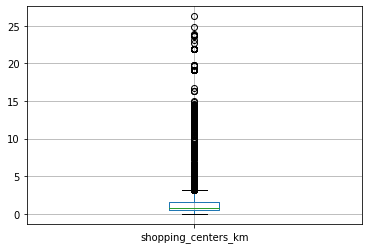

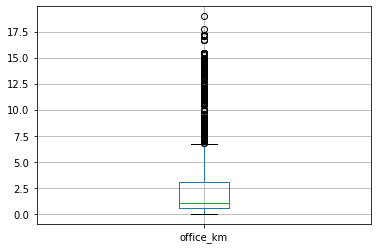

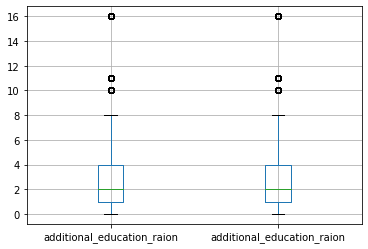

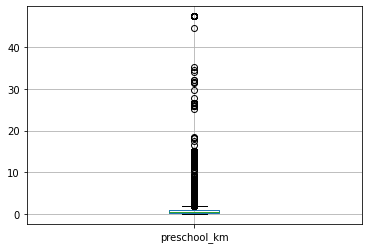

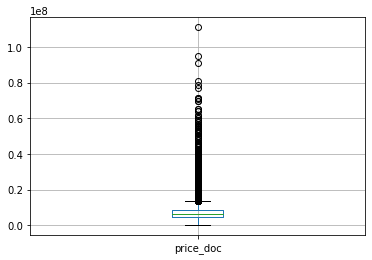

In [13]:
# для визуальной оценки выбросов воспользуемся боксплот-диаграммами по каждому из признаков
plt.figure(figsize = (20,5))
for i in data_selected.columns:
    data_selected[[i]].plot(kind = 'box', grid = True)


In [14]:
# Дополнительно для оценки списка возможных выбросов выведем по каждому признаку 
# подсчет уникальных значений с сортировкой по возрастанию,
# что также позволит увидеть "единичные" и нетипичные отклонения.
for i in data_selected.columns:
    print(data_selected[i].value_counts(ascending=True).to_frame())

     full_sq
303        1
186        1
353        1
10         1
729        1
..       ...
45       943
44      1008
39      1013
37      1232
38      1928

[211 rows x 1 columns]
       life_sq
145.0        1
179.0        1
162.0        1
174.0        1
232.0        1
...        ...
28.0      1067
20.0      1208
18.0      1544
30.0      1565
19.0      2138

[175 rows x 1 columns]
      floor
38.0      1
77.0      1
41.0      1
33.0      1
36.0      2
37.0      2
44.0      2
34.0      3
29.0      3
31.0      5
28.0      6
30.0      6
27.0      7
0.0       9
32.0     14
26.0     14
24.0    100
25.0    104
23.0    125
21.0    138
22.0    173
20.0    180
19.0    212
18.0    231
15.0    747
17.0    795
16.0    811
13.0    918
14.0   1001
11.0   1262
10.0   1307
12.0   1341
8.0    1830
9.0    1843
6.0    1878
7.0    1966
1.0    2002
4.0    2609
5.0    2752
2.0    2874
3.0    3028
       max_floor
38.0           1
117.0          1
41.0           1
44.0           1
57.0           1
42.0      

ValueError: Grouper for 'additional_education_raion' not 1-dimensional

По результатам оценки бокс-плотов и оценки списка возможных выбросов, будем считать выбросами следующие значения признаков:

-full_sq, life_sq > 1000

-floor, max_floor > 50

-2022 < build_year < 1850 (по боксплоту не видно ограничения "снизу", т.е.build_year < 1850, но поставим его исходя из здравого смысла, т.к. вряд ли есть настолько "древние" дома на рынке жилой недвижимости)

-kitch_sq > 250

-state (состояние недвижимости) > 5

Соотв-но, сделаем вышеуказанные преобразования по выбросам, заполним пропуски дифференцированным способом (дискретные заполним модой по колонке, непрерывные заполним средним значением по колонке), а также сделаем преобразования, исходя из ранее сделанного анализа тепловой карты (см.выше):
   
    а) в датасете задублирован признак 'additional_education_raion' (удалим один из них)
    
    б) были выявлены признаки с высокой взаимной корреляцией - 'ttk_km', 'sadovoe_km', 'bulvar_ring_km', 'kremlin_km' 
       Соотв-но, попробуем оставить только один из них, например, 'ttk_km'.
       
    в) были выявлены признаки с высокой взаимной корреляцией - 'preschool_education_centers_raion', 'school_education_centers_raion'.
        Соотв-но, попробуем оставить только один из них, например, 'preschool_education_centers_raion'.

In [15]:
# сперва сделаем копию датасета
set_3 = data_selected.copy()
set_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   full_sq                            30471 non-null  int64  
 1   life_sq                            24088 non-null  float64
 2   floor                              30304 non-null  float64
 3   max_floor                          20899 non-null  float64
 4   material                           20899 non-null  float64
 5   build_year                         16866 non-null  float64
 6   num_room                           20899 non-null  float64
 7   kitch_sq                           20899 non-null  float64
 8   state                              16912 non-null  float64
 9   area_m                             30471 non-null  float64
 10  raion_popul                        30471 non-null  int64  
 11  green_zone_part                    30471 non-null  flo

In [16]:
# Предварительно удалим колонки на основании анализа тепловой карты (пояснения см.выше).
#  1) удалим один из задублированных признаков 'additional_education_raion' (с индексом 42)
set_3.drop(set_3.columns[42], axis=1, inplace=True)
set_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   full_sq                            30471 non-null  int64  
 1   life_sq                            24088 non-null  float64
 2   floor                              30304 non-null  float64
 3   max_floor                          20899 non-null  float64
 4   material                           20899 non-null  float64
 5   build_year                         16866 non-null  float64
 6   num_room                           20899 non-null  float64
 7   kitch_sq                           20899 non-null  float64
 8   state                              16912 non-null  float64
 9   area_m                             30471 non-null  float64
 10  raion_popul                        30471 non-null  int64  
 11  green_zone_part                    30471 non-null  flo

Почему-то удалились оба признака с задублированным наименованием 'additional_education_raion', 
хотя удалял напрямую по номеру индекса... Через drop тоже не получилось...
Попробуем дальше вообще без этого признака обойтись, т.к. по тепловой карте его корреляция с целевой переменной близка к нулю))

In [17]:
# 2) удалим признаки 'sadovoe_km', 'bulvar_ring_km', 'kremlin_km', 'school_education_centers_raion'
set_3.drop(columns=['sadovoe_km', 'bulvar_ring_km', 'kremlin_km', 'school_education_centers_raion'], inplace=True)
set_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   full_sq                            30471 non-null  int64  
 1   life_sq                            24088 non-null  float64
 2   floor                              30304 non-null  float64
 3   max_floor                          20899 non-null  float64
 4   material                           20899 non-null  float64
 5   build_year                         16866 non-null  float64
 6   num_room                           20899 non-null  float64
 7   kitch_sq                           20899 non-null  float64
 8   state                              16912 non-null  float64
 9   area_m                             30471 non-null  float64
 10  raion_popul                        30471 non-null  int64  
 11  green_zone_part                    30471 non-null  flo

In [18]:
# перед удалением выбросов оценим их количество в датасете
print(set_3[set_3['full_sq'] > 1000].shape)
print(set_3[set_3['life_sq'] > 1000].shape)
print(set_3[set_3['floor'] > 50].shape)
print(set_3[set_3['max_floor'] > 50].shape)
print(set_3[(set_3['build_year'] > 2022) | (set_3['build_year'] < 1850)].shape) 
print(set_3[set_3['kitch_sq'] > 250].shape) 
print(set_3[set_3['state'] > 5].shape)

(1, 39)
(1, 39)
(1, 39)
(5, 39)
(906, 39)
(5, 39)
(1, 39)


In [19]:
# Теперь удалим выбросы
set_3 = set_3[(set_3['full_sq'] <= 1000) | (set_3['full_sq'].isna())]
set_3 = set_3[(set_3['life_sq'] <= 1000) | (set_3['life_sq'].isna())]
set_3 = set_3[(set_3['floor'] <= 50) | (set_3['floor'].isna())]
set_3 = set_3[(set_3['max_floor'] <= 50) | (set_3['max_floor'].isna())]
set_3 = set_3[(set_3['build_year'] <= 2022) & (set_3['build_year'] >= 1850) | (set_3['build_year'].isna())]
set_3 = set_3[(set_3['kitch_sq'] <= 250) | (set_3['kitch_sq'].isna())]
set_3 = set_3[(set_3['state'] <= 5) | (set_3['state'].isna())]
set_3.reindex()
set_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29552 entries, 0 to 30470
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   full_sq                            29552 non-null  int64  
 1   life_sq                            23415 non-null  float64
 2   floor                              29385 non-null  float64
 3   max_floor                          19981 non-null  float64
 4   material                           19981 non-null  float64
 5   build_year                         15953 non-null  float64
 6   num_room                           19981 non-null  float64
 7   kitch_sq                           19981 non-null  float64
 8   state                              16186 non-null  float64
 9   area_m                             29552 non-null  float64
 10  raion_popul                        29552 non-null  int64  
 11  green_zone_part                    29552 non-null  flo

In [20]:
# создадим и обучим модель линейной регрессии на датасете set_3
# (с удаленными выбросами, но пока что с заполнением пропусков средними значениями, аналогично предыдущему расчету):

# снова воспользуемся классом SimpleImputer библиотеки scikit-learn
simp = SimpleImputer(missing_values = np.nan, strategy='mean') # будем заполнять пропуски средним значением по колонке
simp = SimpleImputer().fit_transform(set_3) # тренируем и заполняем

# преобразуем результат обратно в датафрейм
transformed_set_3 = pd.DataFrame(simp, columns=set_3.columns)
transformed_set_3

model = LinearRegression()

X = transformed_set_3[['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion', 
'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'ts_km', 
'big_market_km', 'market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km']]

y = transformed_set_3['price_doc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)

# коэфф-т детерминации на тестовой выборке
score = model.score(X_test, y_test)
score_results.append(score)
print("Коэффициент детерминации на датасете transformed_set_3:", score)

Коэффициент детерминации на датасете transformed_set_3: 0.477494260968669


In [21]:
transformed_set_3.describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
count,29552.000000,29552.000000,29552.000000,29552.000000,29552.000000,29552.000000,29552.000000,29552.000000,29552.000000,2.955200e+04,...,29552.000000,29552.000000,29552.000000,29552.000000,29552.000000,29552.000000,29552.000000,29552.000000,29552.000000,2.955200e+04
mean,53.916182,33.775358,7.658874,12.612832,1.842500,1985.365072,1.914319,6.183574,2.147720,1.724989e+07,...,4.860114,13.168218,3.882087,1.124004,6.701117,3.789083,1.470526,1.966797,1.288884,7.143047e+06
std,23.134877,18.225094,5.274934,5.361220,1.223153,15.331167,0.701770,4.132475,0.617769,2.003249e+07,...,4.657324,8.382212,3.327920,1.482111,6.529036,4.712141,2.168474,2.257154,2.880467,4.816171e+06
min,1.000000,0.000000,0.000000,0.000000,1.000000,1860.000000,0.000000,0.000000,1.000000,2.081628e+06,...,0.000000,0.661366,0.003847,0.000000,0.000313,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,38.000000,22.000000,3.000000,9.000000,1.000000,1979.000000,1.914319,5.000000,2.000000,7.128794e+06,...,2.036127,7.462223,1.531180,0.357302,2.180440,1.004568,0.477448,0.549515,0.283411,4.740002e+06
50%,49.000000,33.775358,7.000000,12.612832,1.842500,1985.365072,1.914319,6.183574,2.147720,1.020722e+07,...,3.931830,11.902716,2.875460,0.645957,4.195304,1.964244,0.834101,1.045544,0.486438,6.295002e+06
75%,63.000000,38.000000,11.000000,16.000000,1.842500,1985.365072,2.000000,8.000000,2.147720,1.788191e+07,...,5.504947,16.535909,5.439734,1.274855,9.165272,5.087181,1.500246,2.818490,0.904050,8.300000e+06
max,729.000000,802.000000,44.000000,48.000000,6.000000,2018.000000,19.000000,123.000000,4.000000,2.060718e+08,...,54.080913,59.501648,41.103651,26.652505,84.862148,55.278225,26.259543,18.958933,47.394706,1.111111e+08


Мы видим, что после удаления выбросов и сильнокоррелирующих между собой признаков 
коэфф-т детерминации улучшился (был 0.38332440690058, стал 0.477494260968669).
Но очевидно, что пропуски следует всё же заполнять не средними значениями, 
а дифференцированным способом (дискретные признаки заполним модой, непрерывные - средним значением).

In [22]:
# сделаем копию датасета set_3, ранее уже очищенного от выбросов и ненужных колонок
set_4 = set_3.copy()

# дискретные заполняем модой
fillna_mode = ['floor', 'max_floor', 'material', 'build_year', 'num_room', 'state', 'hospital_beds_raion']

# непрерывные заполняем средним
fillna_mean = ['life_sq', 'kitch_sq', 'metro_min_walk']

# снова воспользуемся классом SimpleImputer библиотеки scikit-learn 
for i in fillna_mode:
    imp = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
    set_4[i] = imp.fit_transform(set_4[[i]])[:, 0]        

for i in fillna_mean:
    imp = SimpleImputer(missing_values = np.nan, strategy='mean')
    set_4[i] = imp.fit_transform(set_4[[i]])[:, 0]        

set_4

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
0,43,27.000000,4.0,17.0,1.0,2014.0,2.0,6.183574,2.0,6.407578e+06,...,4.308127,10.814172,1.676258,0.485841,6.715026,0.884350,0.648488,0.637189,0.177975,5850000
1,34,19.000000,3.0,17.0,1.0,2014.0,2.0,6.183574,2.0,9.589337e+06,...,0.725560,6.910568,3.424716,0.668364,1.852560,0.686252,0.519311,0.688796,0.273345,6000000
2,43,29.000000,2.0,17.0,1.0,2014.0,2.0,6.183574,2.0,4.808270e+06,...,3.562188,5.752368,1.375443,0.733101,0.841254,1.510089,1.486533,1.543049,0.158072,5700000
3,89,50.000000,9.0,17.0,1.0,2014.0,2.0,6.183574,2.0,1.258354e+07,...,0.583025,27.892717,0.811275,0.623484,10.903161,0.622272,0.599914,0.934273,0.236455,13100000
4,77,77.000000,4.0,17.0,1.0,2014.0,2.0,6.183574,2.0,8.398461e+06,...,2.609420,9.155057,1.969738,0.220288,0.991683,0.892668,0.429052,0.077901,0.376838,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.0,1.0,1975.0,2.0,6.000000,3.0,1.005305e+07,...,1.833401,8.820934,0.812253,0.063432,2.236806,1.442576,0.325885,1.103579,0.349899,7400000
30467,86,59.000000,3.0,9.0,2.0,1935.0,4.0,10.000000,3.0,7.307411e+06,...,3.215552,12.102735,1.825643,0.398831,0.672662,0.796851,0.540003,0.069986,0.362681,25000000
30468,45,33.775358,10.0,20.0,1.0,2014.0,1.0,1.000000,1.0,2.553630e+07,...,3.729416,15.546028,6.433794,1.519553,12.893684,9.479093,1.806570,4.338453,1.234235,6970959
30469,64,32.000000,5.0,15.0,1.0,2003.0,2.0,11.000000,2.0,6.050065e+06,...,3.781523,2.515959,2.711199,0.412813,1.982450,2.340429,1.108672,1.204798,0.130667,13500000


In [23]:
set_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29552 entries, 0 to 30470
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   full_sq                            29552 non-null  int64  
 1   life_sq                            29552 non-null  float64
 2   floor                              29552 non-null  float64
 3   max_floor                          29552 non-null  float64
 4   material                           29552 non-null  float64
 5   build_year                         29552 non-null  float64
 6   num_room                           29552 non-null  float64
 7   kitch_sq                           29552 non-null  float64
 8   state                              29552 non-null  float64
 9   area_m                             29552 non-null  float64
 10  raion_popul                        29552 non-null  int64  
 11  green_zone_part                    29552 non-null  flo

In [24]:
set_4.describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
count,29552.000000,29552.000000,29552.000000,29552.000000,29552.000000,29552.000000,29552.000000,29552.000000,29552.000000,2.955200e+04,...,29552.000000,29552.000000,29552.000000,29552.000000,29552.000000,29552.000000,29552.000000,29552.000000,29552.000000,2.955200e+04
mean,53.916182,33.775358,7.632546,14.033703,1.569640,1998.542061,1.942068,6.183574,2.080908,1.724989e+07,...,4.860114,13.168218,3.882087,1.124004,6.701117,3.789083,1.470526,1.966797,1.288884,7.143047e+06
std,23.134877,18.225094,5.286483,5.740866,1.285123,20.946137,0.702915,4.132475,0.622129,2.003249e+07,...,4.657324,8.382212,3.327920,1.482111,6.529036,4.712141,2.168474,2.257154,2.880467,4.816171e+06
min,1.000000,0.000000,0.000000,0.000000,1.000000,1860.000000,0.000000,0.000000,1.000000,2.081628e+06,...,0.000000,0.661366,0.003847,0.000000,0.000313,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,38.000000,22.000000,3.000000,9.000000,1.000000,1979.000000,2.000000,5.000000,2.000000,7.128794e+06,...,2.036127,7.462223,1.531180,0.357302,2.180440,1.004568,0.477448,0.549515,0.283411,4.740002e+06
50%,49.000000,33.775358,6.000000,17.000000,1.000000,2014.000000,2.000000,6.183574,2.000000,1.020722e+07,...,3.931830,11.902716,2.875460,0.645957,4.195304,1.964244,0.834101,1.045544,0.486438,6.295002e+06
75%,63.000000,38.000000,11.000000,17.000000,1.000000,2014.000000,2.000000,8.000000,2.000000,1.788191e+07,...,5.504947,16.535909,5.439734,1.274855,9.165272,5.087181,1.500246,2.818490,0.904050,8.300000e+06
max,729.000000,802.000000,44.000000,48.000000,6.000000,2018.000000,19.000000,123.000000,4.000000,2.060718e+08,...,54.080913,59.501648,41.103651,26.652505,84.862148,55.278225,26.259543,18.958933,47.394706,1.111111e+08


Пропуски заполнены, выбросы и ненужные признаки убраны, теперь обучим модель

In [25]:
model = LinearRegression()

X = set_4[['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion', 
'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'ts_km', 
'big_market_km', 'market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km']]

y = set_4['price_doc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)

# коэфф-т детерминации на тестовой выборке
score = model.score(X_test, y_test)
score_results.append(score)
print("Коэффициент детерминации на датасете set_4:", score)

Коэффициент детерминации на датасете set_4: 0.47834206651866906


Мы видим, что качество предсказаний выросло очень незначительно по сравнению с предыдущим вариантом 
(0.47834206651866906 против 0.477494260968669), и всё еще остается низким, менее 50%.
Попробуем дополнительно нормализовать признаки в обработанном датасете set_4 посредством StandardScaler'а

In [26]:
scaler = StandardScaler()

# берем только входящие признаки без целевой переменной
X_set4_scaled = scaler.fit_transform(X)

# преобразуем результат обратно в датафрейм
X_set4_scaled = pd.DataFrame(X_set4_scaled, columns=X.columns)

In [27]:
X_set4_scaled

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ttk_km,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km
0,-0.471858,-3.717661e-01,-0.687150,0.516707,-0.443265,0.737998,0.082418,2.149302e-16,-0.130053,-0.541245,...,-0.024824,-0.118522,-0.280843,-0.662836,-0.430584,0.002130,-0.616446,-0.379093,-0.589074,-0.385676
1,-0.860887,-8.107287e-01,-0.876315,0.516707,-0.443265,0.737998,0.082418,2.149302e-16,-0.130053,-0.382413,...,-1.011136,-0.887768,-0.746552,-0.137437,-0.307432,-0.742627,-0.658487,-0.438664,-0.566210,-0.352566
2,-0.471858,-2.620255e-01,-1.065480,0.516707,-0.443265,0.737998,0.082418,2.149302e-16,-0.130053,-0.621083,...,-1.033414,-0.278690,-0.884728,-0.753229,-0.263752,-0.897523,-0.483651,0.007382,-0.187739,-0.392586
3,1.516516,8.902515e-01,0.258674,0.516707,-0.443265,0.737998,0.082418,2.149302e-16,-0.130053,-0.232943,...,0.440643,-0.918373,1.756666,-0.922758,-0.337713,0.643604,-0.672065,-0.401493,-0.457453,-0.365374
4,0.997810,2.371750e+00,-0.687150,0.516707,-0.443265,0.737998,0.082418,2.149302e-16,-0.130053,-0.441861,...,-1.185584,-0.483267,-0.478779,-0.574648,-0.609760,-0.874483,-0.614681,-0.480288,-0.836863,-0.316637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29547,-0.428632,-3.717661e-01,-0.119655,-0.876834,-0.443265,-1.123952,0.082418,-4.442314e-02,1.477358,-0.359264,...,-0.347517,-0.649893,-0.518641,-0.922464,-0.715595,-0.683774,-0.497979,-0.527865,-0.382443,-0.325989
29548,1.386839,1.384084e+00,-0.876315,-0.876834,0.334884,-3.033645,2.927762,9.235363e-01,1.477358,-0.496326,...,-1.246559,-0.353119,-0.127115,-0.617947,-0.489292,-0.923346,-0.635016,-0.429122,-0.840370,-0.321552
29549,-0.385407,-3.898771e-16,0.447839,1.039285,-0.443265,0.737998,-1.340254,-1.254372e+00,-1.737464,0.413656,...,0.761509,-0.242783,0.283678,0.766770,0.266887,0.948482,1.207542,0.154971,1.050747,-0.018973
29550,0.435878,-9.741446e-02,-0.497985,0.168322,-0.443265,0.212832,0.082418,1.165526e+00,-0.130053,-0.559092,...,-0.274510,-0.231594,-1.270839,-0.351844,-0.479859,-0.722733,-0.307435,-0.166874,-0.337598,-0.402100


In [28]:
# Повторно обучим модель
model = LinearRegression()

y = set_4['price_doc']

X_train, X_test, y_train, y_test = train_test_split(X_set4_scaled, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)

# коэфф-т детерминации на тестовой выборке
score = model.score(X_test, y_test)
score_results.append(score)
print("Коэффициент детерминации на датасете X_set4_scaled:", score)

Коэффициент детерминации на датасете X_set4_scaled: 0.47834206651436606


Качество после нормализации совсем не изменилось. Попробуем дополнить модель новыми признаками. 
Начнем с использования PolynomialFeatures

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
# ограничимся возведением признаков в квадрат (2-ой степенью), возьмем вычищенный и нормализованный датасет X_set4_scaled
polynomial_features = PolynomialFeatures(degree = 2)

# целевую переменную y = set_4['price_doc'] естественно не трогаем + порядок строк в датасете не меняется
X_polynomial = polynomial_features.fit_transform(X_set4_scaled)

In [31]:
# Повторно обучим модель
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X_polynomial, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)

# коэфф-т детерминации на тестовой выборке
score = model.score(X_test, y_test)
score_results.append(score)
print("Коэффициент детерминации на датасете X_polynomial:", score)

Коэффициент детерминации на датасете X_polynomial: 0.6501053318692338


По-моему, получился неплохой финт)) Качество предсказаний выросло сразу с 0.47834206651436606 до 0.6501053318692338.
Попробуем дополнительно (вручную) ввести новые признаки к датасету set4 (до нормализации, иначе неудобно обрабатывать признаки) и сравнить качество с полиномиальной моделью (датасет X_polynomial).

Из анализа тепловой карты можно сделать вывод, что в исходном датасете  достаточно много признаков, слабо коррелирующих с ценой недвижимости. Поэтому нет смысла строить новые признаки на таких "аутсайдерах", т.к. это вряд ли даст большой прирост качества.

Напрашиваются следующие новые признаки, логически вытекающие из сильно влияющих на цену недвижимости:
- отношение жилой площади 'life_sq' к общей площади 'full_sq'
- индикаторную переменную "первый этаж". Будет равна 1, если квартира находится на первом этаже ('floor'=1), иначе 0.
- индикаторную переменную по году постройки дома 'build_year' (например, дом старше 2000 года постройки или нет)
- сделать One-hot-encoding для материала, из которого построен дом (признак 'material')

In [32]:
# Сделаем копию вычищенного датасета set_4
set_5 = set_4.copy()

In [33]:
# 1) добавляем признак отношения жилой площади 'life_sq' к общей площади 'full_sq'
set_5['life-to-full-sq'] = set_5['life_sq'] / set_5['full_sq']

In [34]:
set_5.tail()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc,life-to-full-sq
30466,44,27.000000,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,1.005305e+07,...,8.820934,0.812253,0.063432,2.236806,1.442576,0.325885,1.103579,0.349899,7400000,0.613636
30467,86,59.000000,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,7.307411e+06,...,12.102735,1.825643,0.398831,0.672662,0.796851,0.540003,0.069986,0.362681,25000000,0.686047
30468,45,33.775358,10.0,20.0,1.0,2014.0,1.0,1.0,1.0,2.553630e+07,...,15.546028,6.433794,1.519553,12.893684,9.479093,1.806570,4.338453,1.234235,6970959,0.750564
30469,64,32.000000,5.0,15.0,1.0,2003.0,2.0,11.0,2.0,6.050065e+06,...,2.515959,2.711199,0.412813,1.982450,2.340429,1.108672,1.204798,0.130667,13500000,0.500000
30470,43,28.000000,1.0,9.0,1.0,1968.0,2.0,6.0,2.0,4.395333e+06,...,14.028112,1.902431,0.819001,2.731394,3.065101,0.224601,2.108265,0.378950,5600000,0.651163


In [35]:
# Повторно обучим модель
model = LinearRegression()

X = set_5[['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion', 
'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'ts_km', 
'big_market_km', 'market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'life-to-full-sq']]

y = set_5['price_doc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)

# коэфф-т детерминации на тестовой выборке
score = model.score(X_test, y_test)
score_results.append(score)
print("Коэффициент детерминации на датасете set_5:", score)

Коэффициент детерминации на датасете set_5: 0.47854100752600304


Коэффициент детерминации улучшился совсем незначительно 
(на датасете set_4 = 0.47834206651866906; на датасете set_5 = 0.47854100752600304) 
и он значительно хуже полученного на полиномиальной модели.

In [36]:
# 2) Теперь введем индикаторную переменную "первый этаж". 
# Будет равна 1, если квартира находится на первом этаже ('floor'=1), иначе 0.

set_5['is_first_floor'] = set_5['floor'].map(lambda x: 1 if x==1 else 0)

set_5['is_first_floor'].value_counts()

0    27625
1     1927
Name: is_first_floor, dtype: int64

In [37]:
# Повторно обучим модель
model = LinearRegression()

X = set_5[['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion', 
'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'ts_km', 
'big_market_km', 'market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'life-to-full-sq', 'is_first_floor']]

y = set_5['price_doc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)

# коэфф-т детерминации на тестовой выборке
score = model.score(X_test, y_test)
score_results.append(score)
print("Коэффициент детерминации на датасете set_5:", score)

Коэффициент детерминации на датасете set_5: 0.4802202522236553


Качество модели незначительно улучшилось с 0.47854100752600304 до 0.4802202522236553

In [38]:
# 3) добавим индикаторную переменную по году постройки дома 'build_year' (например, дом старше 2000 года постройки или нет)
set_5['is_old_house'] = set_5['build_year'].map(lambda x: 1 if x<2000 else 0)

set_5['is_old_house'].value_counts()

0    18840
1    10712
Name: is_old_house, dtype: int64

In [39]:
# Повторно обучим модель
model = LinearRegression()

X = set_5[['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion', 
'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'ts_km', 
'big_market_km', 'market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'life-to-full-sq', 'is_first_floor', 'is_old_house']]

y = set_5['price_doc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)

# коэфф-т детерминации на тестовой выборке
score = model.score(X_test, y_test)
score_results.append(score)
print("Коэффициент детерминации на датасете set_5:", score)

Коэффициент детерминации на датасете set_5: 0.4801061014358705


Качество незначительно ухудшилось... Попробуем удалить из признаков 'build_year' (не из датасета set_5, а из выборки, просто чтобы проверить гипотезу), оставив взамен индикатор 'is_old_house'.
Возможно, в сторону ухудшения модели играет корреляция между 'build_year' и 'is_old_house'

In [40]:
# Повторно обучим модель
model = LinearRegression()

X = set_5[['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion', 
'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'ts_km', 
'big_market_km', 'market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'life-to-full-sq', 'is_first_floor', 'is_old_house']]

y = set_5['price_doc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)

# коэфф-т детерминации на тестовой выборке
score = model.score(X_test, y_test)
score_results.append(score)
print("Коэффициент детерминации на датасете set_5:", score)

Коэффициент детерминации на датасете set_5: 0.4804077822532341


Качество незначительно подросло 0.4801061014358705 -> 0.4804077822532341, но в пределах погрешности...
Особого смысла выкидывать 'build_year' после добавления индикатора 'is_old_house' не было.

In [41]:
# 4) сделаем One-hot-encoding для материала, из которого построен дом (признак 'material')

set_6 = pd.get_dummies(set_5, columns=['material'])
set_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29552 entries, 0 to 30470
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   full_sq                            29552 non-null  int64  
 1   life_sq                            29552 non-null  float64
 2   floor                              29552 non-null  float64
 3   max_floor                          29552 non-null  float64
 4   build_year                         29552 non-null  float64
 5   num_room                           29552 non-null  float64
 6   kitch_sq                           29552 non-null  float64
 7   state                              29552 non-null  float64
 8   area_m                             29552 non-null  float64
 9   raion_popul                        29552 non-null  int64  
 10  green_zone_part                    29552 non-null  float64
 11  indust_part                        29552 non-null  flo

In [42]:
# Повторно обучим модель
model = LinearRegression()

X = set_6[['full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion', 
'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'ts_km', 
'big_market_km', 'market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'life-to-full-sq', 'is_first_floor', 'is_old_house',
'material_1.0', 'material_2.0', 'material_3.0', 'material_4.0', 'material_5.0', 'material_6.0']]

y = set_6['price_doc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)

# коэфф-т детерминации на тестовой выборке
score = model.score(X_test, y_test)
score_results.append(score)
print("Коэффициент детерминации на датасете set_6:", score)

Коэффициент детерминации на датасете set_6: 0.4831346152631246


Качество модели ещё незначительно подросло 0.4804077822532341 -> 0.4831346152631246, 
но полиномиальная модель остается всё так же вне досягаемости с коэфф-том детерминации 0.6501053318692338.
Построим график изменения коэфф-та детерминации.

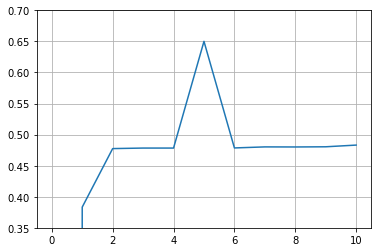

In [43]:
plt.plot(score_results)
plt.ylim(0.35, 0.7) #самый первый результат с минус 57 оставим "за бортом"
plt.grid()
plt.show()